# **A Data Science Project on Credit Default Risk Analysis**
##### Author:Mukesh Kumar Chaudhary
##### Email:cmukesh8688@gmail.com

### **Problem Statement**
Home Credit B.V. is an international non-bank financial institution founded in 1997 in the Czech Republic.The company operates in 14 countries and focuses on lending primarily to people with little or no credit history. As of 2016 the company has over 15 million active customers, with two-thirds of them in Asia and 7.3 million in China. 

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


### **Data**


- application_{train|test}.csv

 - This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
 - Static data for all applications. One row represents one loan in our data sample.
 
 
- bureau.csv
 - All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a      loan in our sample).
 - For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.
 
 
- bureau_balance.csv
 - Monthly balances of previous credits in Credit Bureau.
 - This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in      sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.
 

- POS_CASH_balance.csv
 - Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
 - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to    loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some        history observable for the previous credits) rows.
 
 
- credit_card_balance.csv
 - Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
 - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to    loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some      history observable for the previous credit card) rows.
 
 
- previous_application.csv
 - All previous applications for Home Credit loans of clients who have loans in our sample.
 - There is one row for each previous application related to loans in our data sample.
 
 
- installments_payments.csv
 - Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
   There is a) one row for every payment that was made plus b) one row each for missed payment.
   One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit    credit related to loans in our sample.
   

- train_bureau.csv 
 - This dataframe is created manualy by group joining application_train,bureau and bureau_balance dataframe with aggregation funtion count,sum,max,min,mean .
 
 
- previous_loan_final.csv
 -  This dataframe is created manually by group joining previous_application,POS_CASH_balance,credi_card_balance and intallments_payments dataframe with aggregation funtion count,sum,max,min,mean .
 
 
- home_credit_final.csv
 - This dataframe is created manually by joining train_bureau.csv and previous_loan_final.csv. 
 
 
- automative_features_app.csv
 - This is created by auto generated library ***featuretools*** with aggregation premitives sum,max,min,mode,mean,count
 
 
![image](image/database_flowchart.png)


In [1]:
# import all necessary libraries
# for data mauplation
import pandas as pd 
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


# ignore warnig from pandas
import warnings
warnings.filterwarnings("ignore")


# for featuretools
import featuretools as ft

# import user libraries 
from text_format_class import TxtFormat 
import manage_missing_data as manage_df
import manage_dataframe as manage_agg_cat
import display_corr as manage_corr
import manage_model
import manage_pca
import plot_features
%load_ext autoreload
%autoreload 2



In [2]:
# import sklearn library for preprocessing ,modelling , Accuracy Analysis , Cross Validation , optimization 

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from  sklearn.model_selection import train_test_split

# Gradient Boosting algorithm
import os
import lightgbm as lgb
sns.set_style("darkgrid")

### Retrieving Data and Data dimension

In [3]:
# upload all Data 
pd.options.display.max_columns = None
df_app_train = pd.read_csv("Data/application_train.csv")
df_app_test = pd.read_csv("Data/application_test.csv")
df_bureau = pd.read_csv("Data/bureau.csv")
df_bureau_balance = pd.read_csv("Data/bureau_balance.csv")
df_previous = pd.read_csv("Data/previous_application.csv")
df_credit = pd.read_csv("Data/credit_card_balance.csv")
df_cash = pd.read_csv("Data/POS_CASH_balance.csv")
df_payment = pd.read_csv("Data/installments_payments.csv")

In [5]:
# Dimension of Data 
print("Dimension of Data")
print("------------------")
print("Application Train    : ", df_app_train.shape )
print("Application Test     :",df_app_test.shape)
print("Bureau               :" ,df_bureau.shape)
print("Bureau Balance       :",df_bureau_balance.shape)
print("Previous application : ",df_previous.shape)
print("Credit card balance  :",df_credit.shape)
print("POSH_CASH_balance    :" ,df_cash.shape)
print("Instalments payment  :",df_payment.shape)


Dimension of Data
------------------
Application Train    :  (307511, 122)
Application Test     : (48744, 121)
Bureau               : (1716428, 17)
Bureau Balance       : (27299925, 3)
Previous application :  (1670214, 37)
Credit card balance  : (3840312, 23)
POSH_CASH_balance    : (10001358, 8)
Instalments payment  : (13605401, 8)


In [6]:
# application_train from Home credit
print(df_app_train.shape)
df_app_train.head()


(307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [7]:
# for test application
print(df_app_test.shape)
df_app_test.head()

(48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

In [8]:
# check columns names between application test and application train 
for col in df_app_train.columns:
    if col not in df_app_test.columns:
        print(col)

TARGET


In [9]:
#pd.options.display.max_columns = None
print(df_app_train.columns.values)

['SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'WEEKDAY_APPR_PROCESS_START'
 'HOUR_APPR_PROCESS_START' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG' 'ENTRANCES_AVG' 'FLOOR

In [10]:
# credit history from another bureau
print(df_bureau.shape)
df_bureau.head()

(1716428, 17)


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [11]:
# features of bureau dataset
df_bureau.columns.values

array(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE',
       'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY'], dtype=object)

In [12]:
# bureau balance 
print(df_bureau_balance.shape)
df_bureau_balance.head()

(27299925, 3)


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [13]:
# features of bureau balance dataset
df_bureau_balance.columns.values

array(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype=object)

In [14]:
# previous applicattion 
print(df_previous.shape)
df_previous.head()


(1670214, 37)


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [15]:
# features of previous application 
df_previous.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [16]:
#Credit card balance dataset
print(df_credit.shape)
df_credit.head()

(3840312, 23)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [17]:
# features of credit card balance dataset
df_credit.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
       'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'], dtype=object)

In [18]:
# POSH_CASH balance dataset 
print(df_cash.shape)
df_cash.head()

(10001358, 8)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [19]:
# features of POSH_CASH balance dataset
df_cash.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'], dtype=object)

In [20]:
# instalments payments dataset 
print(df_payment.shape)
df_payment.head()

(13605401, 8)


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [21]:
# features of instalments_payments 
df_payment.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'], dtype=object)

### Checking missing values

In [22]:
# application train
manage_df.missing_data_display(df_app_train)

Total    Percent
COMMONAREA_MEDI              214865  69.872297
COMMONAREA_AVG               214865  69.872297
COMMONAREA_MODE              214865  69.872297
NONLIVINGAPARTMENTS_MODE     213514  69.432963
NONLIVINGAPARTMENTS_MEDI     213514  69.432963
...                             ...        ...
REG_CITY_NOT_LIVE_CITY            0   0.000000
LIVE_REGION_NOT_WORK_REGION       0   0.000000
REG_REGION_NOT_WORK_REGION        0   0.000000
HOUR_APPR_PROCESS_START           0   0.000000
SK_ID_CURR                        0   0.000000

[122 rows x 2 columns]

In [23]:
# delete missing value more than 40% 
manage_df.delete_missing_values(df_app_train)
manage_df.handle_missing_value(df_app_train)
manage_df.missing_data_display(df_app_train)

Total  Percent
AMT_REQ_CREDIT_BUREAU_YEAR       0      0.0
LIVE_REGION_NOT_WORK_REGION      0      0.0
DAYS_REGISTRATION                0      0.0
DAYS_ID_PUBLISH                  0      0.0
FLAG_MOBIL                       0      0.0
...                            ...      ...
FLAG_DOCUMENT_3                  0      0.0
FLAG_DOCUMENT_4                  0      0.0
FLAG_DOCUMENT_5                  0      0.0
FLAG_DOCUMENT_6                  0      0.0
SK_ID_CURR                       0      0.0

[73 rows x 2 columns]

In [24]:
#application test 
manage_df.delete_missing_values(df_app_test)
manage_df.handle_missing_value(df_app_test)
manage_df.missing_data_display(df_app_test)

Total  Percent
AMT_REQ_CREDIT_BUREAU_YEAR      0      0.0
AMT_REQ_CREDIT_BUREAU_QRT       0      0.0
DAYS_ID_PUBLISH                 0      0.0
FLAG_MOBIL                      0      0.0
FLAG_EMP_PHONE                  0      0.0
...                           ...      ...
FLAG_DOCUMENT_4                 0      0.0
FLAG_DOCUMENT_5                 0      0.0
FLAG_DOCUMENT_6                 0      0.0
FLAG_DOCUMENT_7                 0      0.0
SK_ID_CURR                      0      0.0

[72 rows x 2 columns]

In [25]:
#Bureau dataset
manage_df.delete_missing_values(df_bureau)
manage_df.handle_missing_value(df_bureau)
manage_df.missing_data_display(df_bureau)

Total  Percent
DAYS_CREDIT_UPDATE          0      0.0
CREDIT_TYPE                 0      0.0
AMT_CREDIT_SUM_OVERDUE      0      0.0
AMT_CREDIT_SUM_LIMIT        0      0.0
AMT_CREDIT_SUM_DEBT         0      0.0
AMT_CREDIT_SUM              0      0.0
CNT_CREDIT_PROLONG          0      0.0
DAYS_ENDDATE_FACT           0      0.0
DAYS_CREDIT_ENDDATE         0      0.0
CREDIT_DAY_OVERDUE          0      0.0
DAYS_CREDIT                 0      0.0
CREDIT_CURRENCY             0      0.0
CREDIT_ACTIVE               0      0.0
SK_ID_BUREAU                0      0.0
SK_ID_CURR                  0      0.0

In [26]:
#bureu balance dataset 
manage_df.delete_missing_values(df_bureau_balance)
manage_df.handle_missing_value(df_bureau_balance)
manage_df.missing_data_display(df_bureau_balance)
print(df_bureau_balance.shape)

(27299925, 3)


In [27]:
#previous application dataset
print(df_previous.shape)
manage_df.delete_missing_values(df_previous)
manage_df.handle_missing_value(df_previous)
print(df_previous.shape)
manage_df.missing_data_display(df_previous)


(1670214, 37)
(1670214, 26)


Total  Percent
PRODUCT_COMBINATION              0      0.0
NAME_YIELD_GROUP                 0      0.0
SK_ID_CURR                       0      0.0
NAME_CONTRACT_TYPE               0      0.0
AMT_ANNUITY                      0      0.0
AMT_APPLICATION                  0      0.0
AMT_CREDIT                       0      0.0
AMT_GOODS_PRICE                  0      0.0
WEEKDAY_APPR_PROCESS_START       0      0.0
HOUR_APPR_PROCESS_START          0      0.0
FLAG_LAST_APPL_PER_CONTRACT      0      0.0
NFLAG_LAST_APPL_IN_DAY           0      0.0
NAME_CASH_LOAN_PURPOSE           0      0.0
NAME_CONTRACT_STATUS             0      0.0
DAYS_DECISION                    0      0.0
NAME_PAYMENT_TYPE                0      0.0
CODE_REJECT_REASON               0      0.0
NAME_CLIENT_TYPE                 0      0.0
NAME_GOODS_CATEGORY              0      0.0
NAME_PORTFOLIO                   0      0.0
NAME_PRODUCT_TYPE                0      0.0
CHANNEL_TYPE                     0      0.0
SELLERPLACE_AREA                 0      0.0
NAME_SELLER_INDUSTRY             0      0.0
CNT_PAYMENT                      0      0.0
SK_ID_PREV                       0      0.0

In [28]:
#POSh_CASH dataset 
print(df_cash.shape)
manage_df.delete_missing_values(df_cash)
manage_df.handle_missing_value(df_cash)
print(df_cash.shape)
manage_df.missing_data_display(df_cash)

(10001358, 8)
(10001358, 8)


Total  Percent
SK_DPD_DEF                 0      0.0
SK_DPD                     0      0.0
NAME_CONTRACT_STATUS       0      0.0
CNT_INSTALMENT_FUTURE      0      0.0
CNT_INSTALMENT             0      0.0
MONTHS_BALANCE             0      0.0
SK_ID_CURR                 0      0.0
SK_ID_PREV                 0      0.0

In [29]:
#credit balance dataset 
print(df_credit.shape)
manage_df.delete_missing_values(df_credit)
manage_df.handle_missing_value(df_credit)
print(df_credit.shape)
manage_df.missing_data_display(df_credit)

(3840312, 23)
(3840312, 23)


Total  Percent
SK_DPD_DEF                      0      0.0
AMT_PAYMENT_CURRENT             0      0.0
SK_ID_CURR                      0      0.0
MONTHS_BALANCE                  0      0.0
AMT_BALANCE                     0      0.0
AMT_CREDIT_LIMIT_ACTUAL         0      0.0
AMT_DRAWINGS_ATM_CURRENT        0      0.0
AMT_DRAWINGS_CURRENT            0      0.0
AMT_DRAWINGS_OTHER_CURRENT      0      0.0
AMT_DRAWINGS_POS_CURRENT        0      0.0
AMT_INST_MIN_REGULARITY         0      0.0
AMT_PAYMENT_TOTAL_CURRENT       0      0.0
SK_DPD                          0      0.0
AMT_RECEIVABLE_PRINCIPAL        0      0.0
AMT_RECIVABLE                   0      0.0
AMT_TOTAL_RECEIVABLE            0      0.0
CNT_DRAWINGS_ATM_CURRENT        0      0.0
CNT_DRAWINGS_CURRENT            0      0.0
CNT_DRAWINGS_OTHER_CURRENT      0      0.0
CNT_DRAWINGS_POS_CURRENT        0      0.0
CNT_INSTALMENT_MATURE_CUM       0      0.0
NAME_CONTRACT_STATUS            0      0.0
SK_ID_PREV                      0      0.0

In [30]:
#payment balance dataset 
print(df_payment.shape)
manage_df.delete_missing_values(df_payment)
manage_df.handle_missing_value(df_payment)
print(df_payment.shape)
manage_df.missing_data_display(df_payment)

(13605401, 8)
(13605401, 8)


Total  Percent
AMT_PAYMENT                 0      0.0
AMT_INSTALMENT              0      0.0
DAYS_ENTRY_PAYMENT          0      0.0
DAYS_INSTALMENT             0      0.0
NUM_INSTALMENT_NUMBER       0      0.0
NUM_INSTALMENT_VERSION      0      0.0
SK_ID_CURR                  0      0.0
SK_ID_PREV                  0      0.0

In [31]:
df_app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

## Data Exploration

#### Application train and test data 

In [33]:
# About Application train dataframe

print(df_app_train.shape)
df_app_train.head()

(307511, 73)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [34]:
# features of df_application_train 
df_app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

Status of Target
------------------
total_no_applicant :  307511  
total loan was repaid:  282686  and Percent :   92.0 %   
total loan was not repaid:  24825  and Percent :  8.0 %   


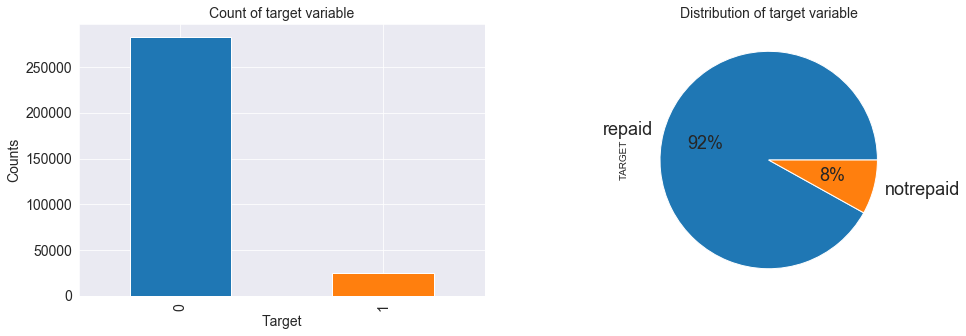

In [41]:
# calculating percentage of not repaid loan and ploting 

total_no_applicant = df_app_train['TARGET'].count()

total_repaid = df_app_train[df_app_train['TARGET']==0]['TARGET'].count()

total_not_repaid = df_app_train[df_app_train['TARGET']==1]['TARGET'].count()



start = "\033[1m"
end = "\033[0;0m"

print("Status of Target")
print("------------------")
print(f"total_no_applicant : {TxtFormat().BOLD} {total_no_applicant} {TxtFormat().END} ")
print(f"""total loan was repaid: {TxtFormat().BOLD} {total_repaid} {TxtFormat().END} and Percent :  {TxtFormat().BOLD} {round(total_repaid/total_no_applicant *100)} %  {TxtFormat().END} """)
print(f"total loan was not repaid: {TxtFormat().BOLD} {total_not_repaid} {TxtFormat().END} and Percent : {TxtFormat().BOLD} {round(total_not_repaid/total_no_applicant *100)} %  {TxtFormat().END} ")


# plot graph

fig , ax = plt.subplots(nrows=1,ncols=2,figsize=(16,5))
df_app_train['TARGET'].value_counts().plot(kind='bar' ,colors = sns.color_palette(), ax =ax[0], fontsize = 14 , label = '0: Repaid \n 1: Notrepaid')
ax[0].set_title("Count of target variable",fontsize = 14)
ax[0].set_ylabel("Counts", fontsize = 14)
ax[0].set_xlabel("Target",fontsize = 14)

df_app_train['TARGET'].value_counts().plot.pie(autopct = "%1.0f%%", colors = sns.color_palette(), labels = ['repaid','notrepaid'],fontsize =18 ,ax =ax[1])
ax[1].set_title("Distribution of target variable",fontsize = 14)

fig.savefig(" Target Level.png")

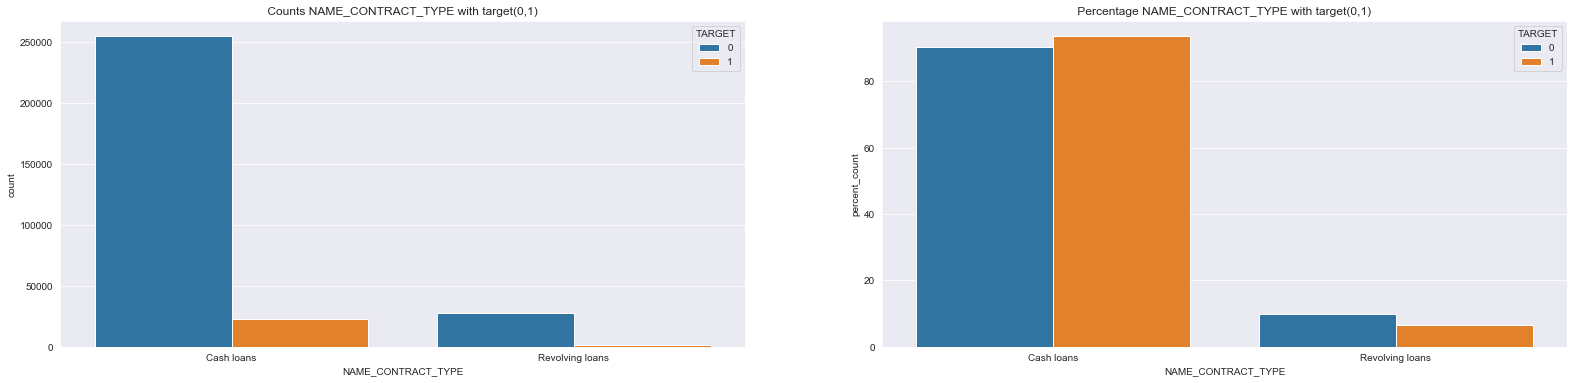

In [43]:
# status of NAME_CONTRACT_TYPE with target
plot_features.display_targetfeature(df_app_train,'TARGET','NAME_CONTRACT_TYPE','SK_ID_CURR',horizantal= False)


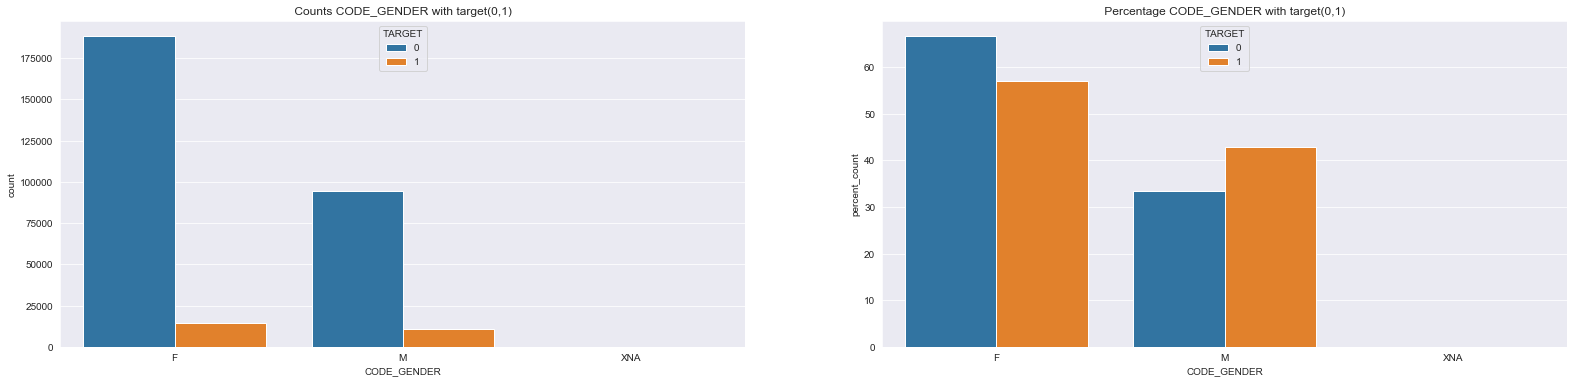

In [37]:
# Gender with respect to target
plot_features.display_targetfeature(df_app_train,'TARGET','CODE_GENDER','SK_ID_CURR',horizantal= False)

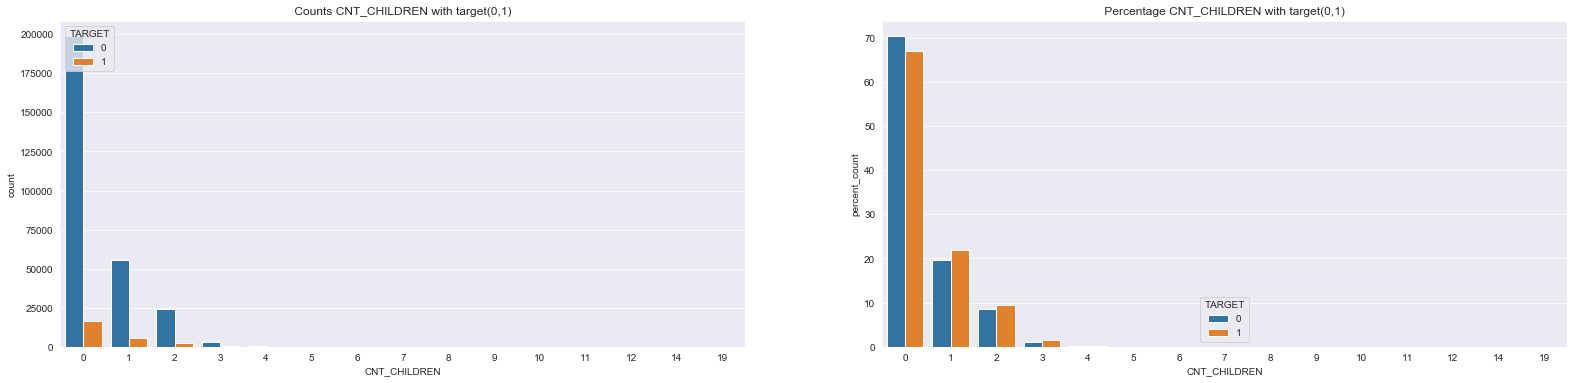

No handles with labels found to put in legend.


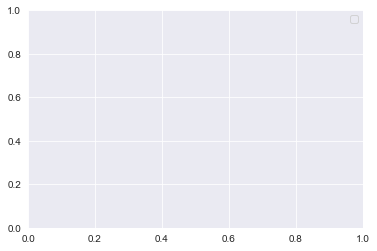

In [87]:
# status CNT_CHILDREN
plot_features.display_targetfeature(df_app_train,'TARGET','CNT_CHILDREN','SK_ID_CURR',horizantal= False)
plt.legend(loc='best')


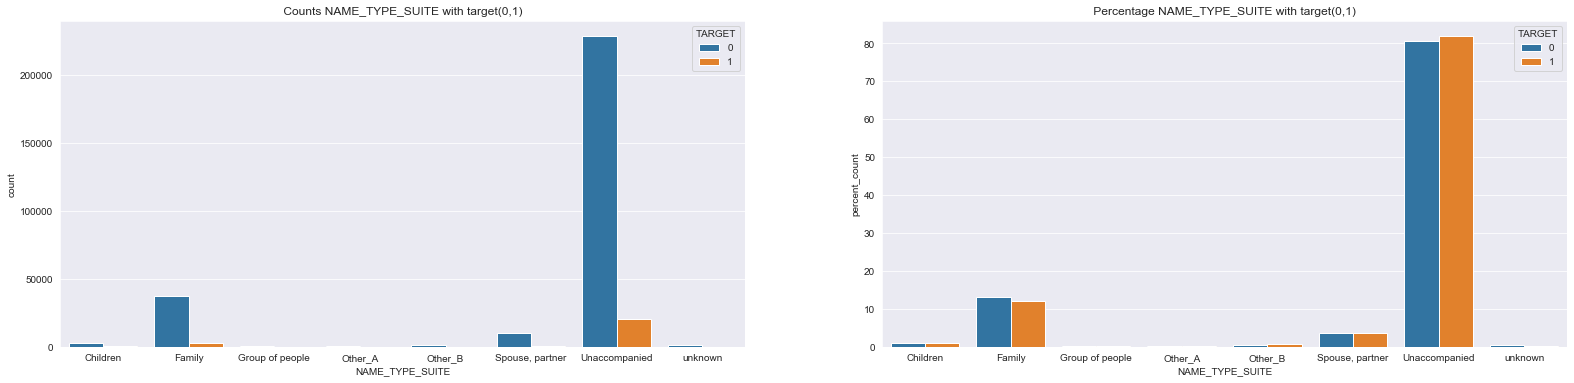

In [38]:
# NAME_TYPE_SUITE

plot_features.display_targetfeature(df_app_train,'TARGET','NAME_TYPE_SUITE','SK_ID_CURR',horizantal=False)

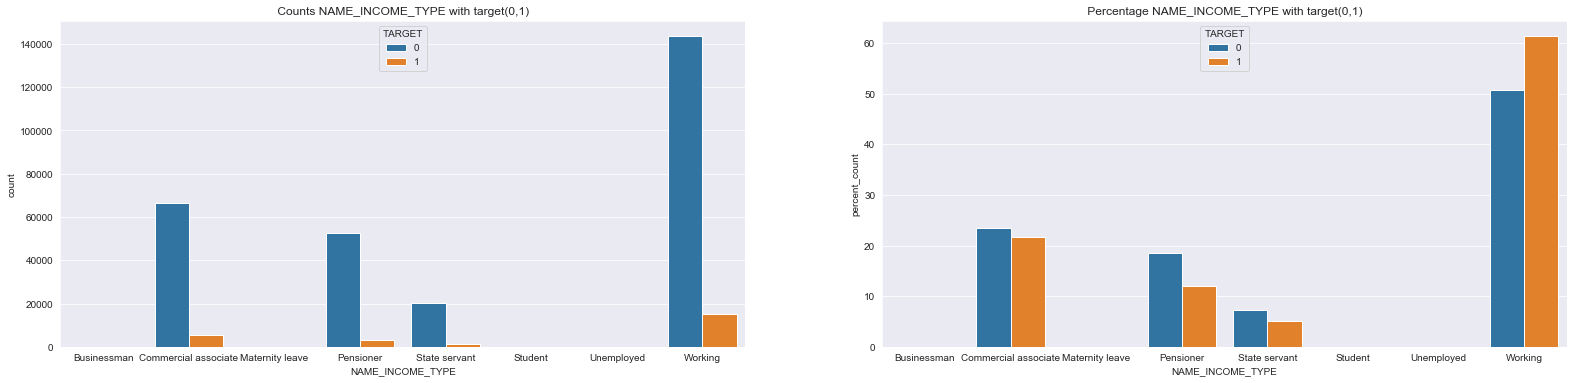

In [39]:
# NAME_INCOME_TYPE  feature plot with target 

plot_features.display_targetfeature(df_app_train,'TARGET','NAME_INCOME_TYPE','SK_ID_CURR',horizantal=False)


It seems working income type percetage on both target (0 , 1) has high 

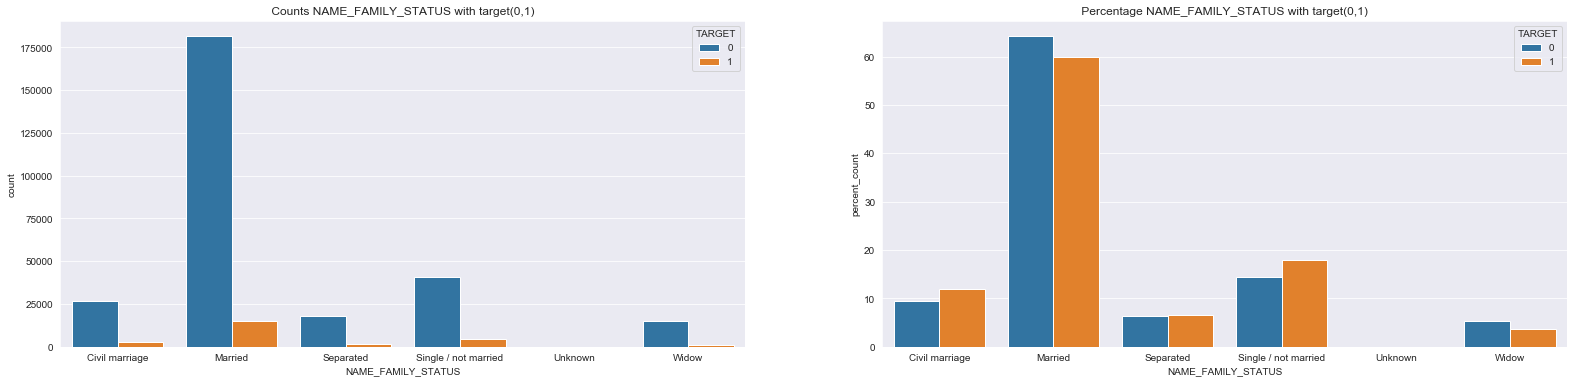

In [40]:
# family status
plot_features.display_targetfeature(df_app_train,'TARGET','NAME_FAMILY_STATUS','SK_ID_CURR')

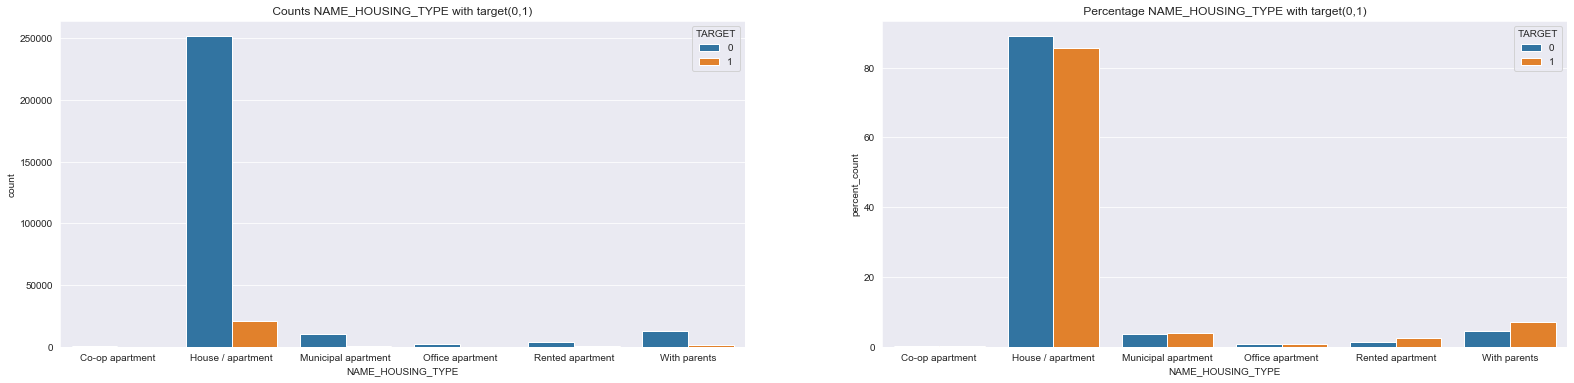

In [41]:
# status of NAME_HOUSING_TYPE
plot_features.display_targetfeature(df_app_train,'TARGET','NAME_HOUSING_TYPE','SK_ID_CURR')


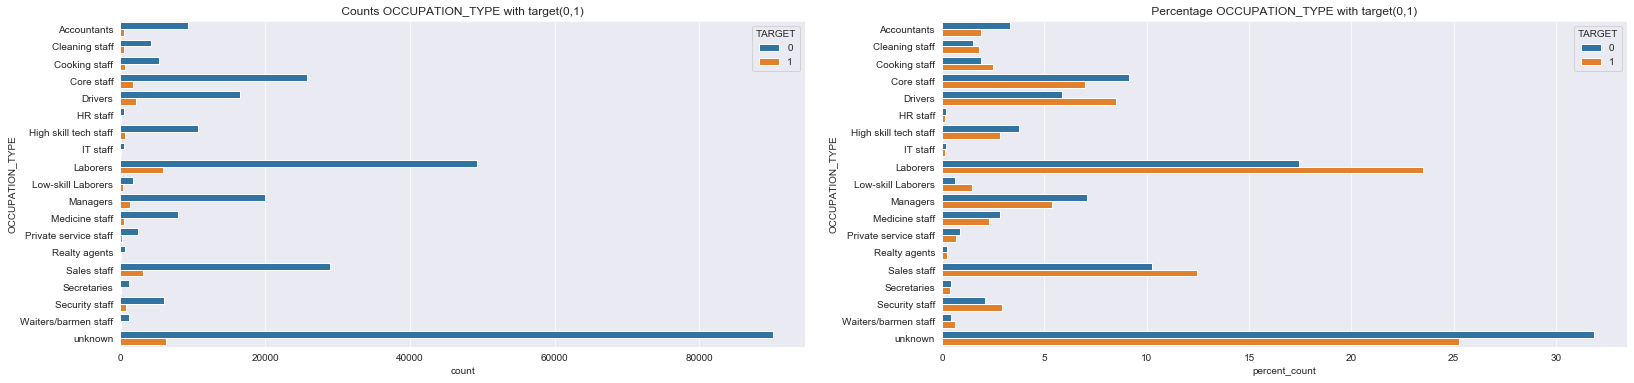

In [42]:
# status of OCCUPATION_TYPE

plot_features.display_targetfeature(df_app_train,'TARGET','OCCUPATION_TYPE','SK_ID_CURR',horizantal=True)

In [43]:
df_app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

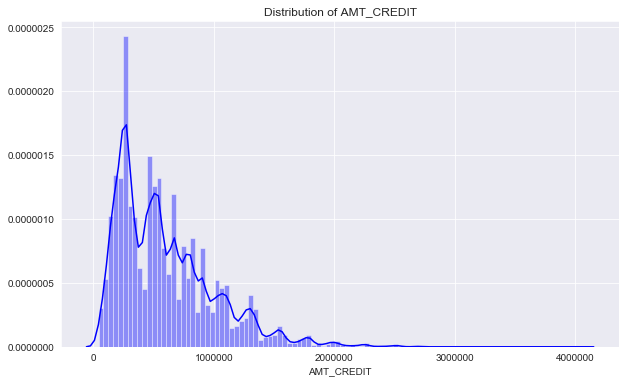

In [44]:
# distribution of Amount of Credit
plot_features.plot_distribution_feature(df_app_train,'AMT_CREDIT','blue')

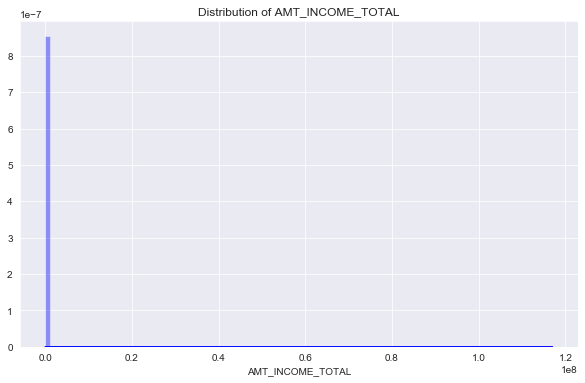

In [45]:
plot_features.plot_distribution_feature(df_app_train,'AMT_INCOME_TOTAL','blue')

In [ ]:
#check outlier 

#df_app_train['AMT_INCOME_TOTAL'].boxplot()

from scipy import stats

df_app_train[(np.abs(stats.zscore(df_app_train)) < 3).all(axis=1)]

#np.abs(stats.zscore(df_app_train['AMT_INCOME_TOTAL']) < 3).all()

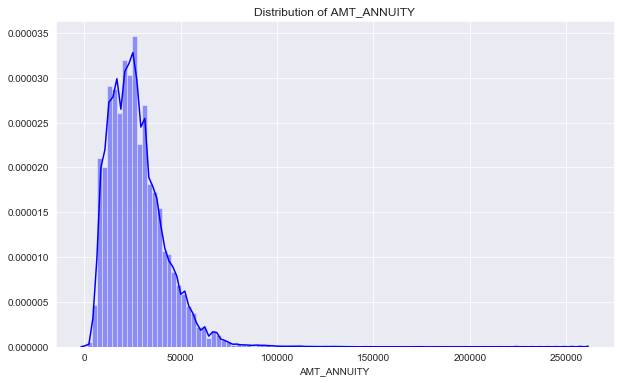

In [46]:
# AMT_ANNUITY
plot_features.plot_distribution_feature(df_app_train,'AMT_ANNUITY','blue')

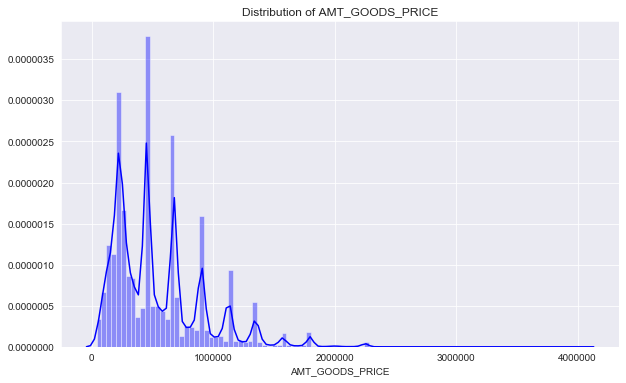

In [47]:
#   AMT_GOODS_PRICE

plot_features.plot_distribution_feature(df_app_train,'AMT_GOODS_PRICE','blue')

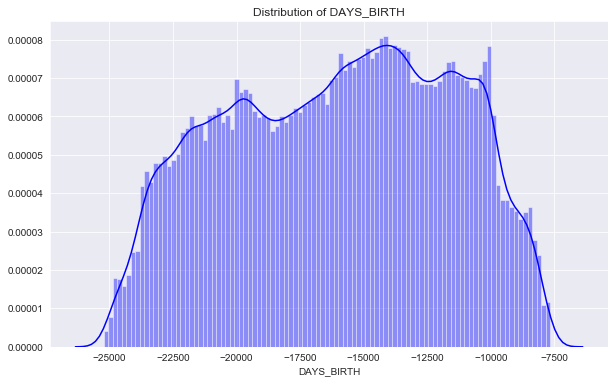

In [48]:
plot_features.plot_distribution_feature(df_app_train,'DAYS_BIRTH','blue')

 The negative value means that date pf birth is in past . The age range 
 is between approximative 20 to 68   

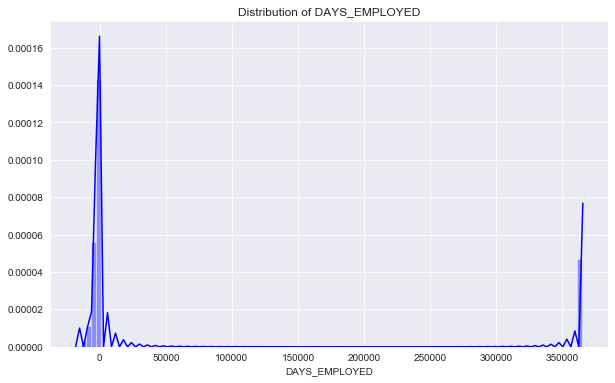

In [49]:
# Day employed distribution 
plot_features.plot_distribution_feature(df_app_train,'DAYS_EMPLOYED','blue')

The negetive value means unemployed but it's not clear. Most of people employed more than 100 years

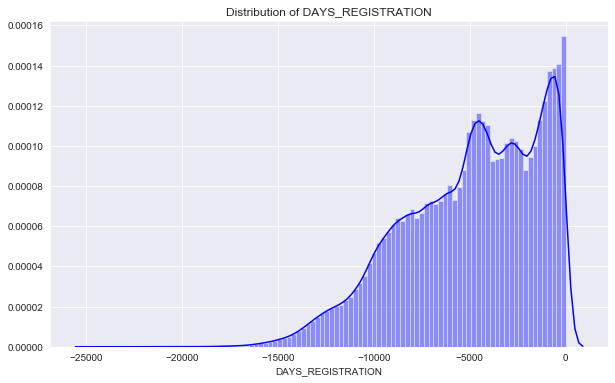

In [50]:
# Days of registration distribution
plot_features.plot_distribution_feature(df_app_train,'DAYS_REGISTRATION','blue')

The correlation between EXT_SOURCE_3 and the TARGET is -0.1559
Median value for loan that was not repaid = 0.4758
Median value for loan that was repaid = 0.5353


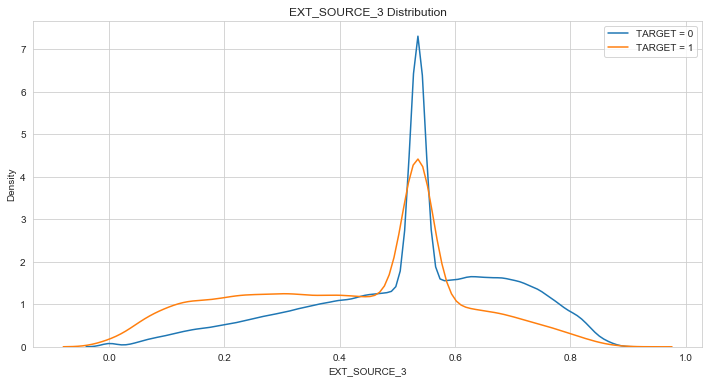

In [366]:
# kde plot EXT_SOURCE_3

manage_corr.Kde_target('EXT_SOURCE_3',df_app_train)

In [50]:
var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']

for v in var:
    a = str(v).split()
    print(a)
    
a = 'Mukesh'

print(a.split())    

['AMT_ANNUITY']
['AMT_GOODS_PRICE']
['DAYS_EMPLOYED']
['DAYS_REGISTRATION']
['DAYS_BIRTH']
['DAYS_ID_PUBLISH']


ValueError: empty separator

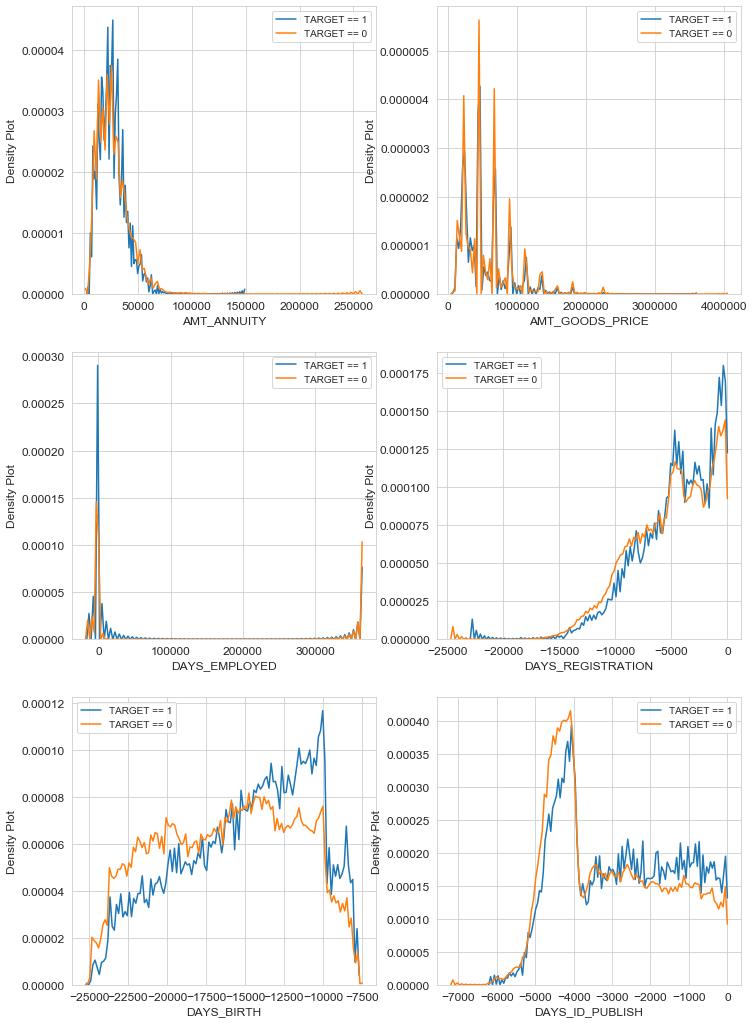

In [51]:
#compare with target = 1 and target = 0 with 
# var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']


var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']
plot_features.plot_distribution_comp(df_app_train,var,3)

In [367]:
# check top 10 features correlation with target

manage_corr.target_corrs(df_app_train)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

### EDA when join application train and previous loan

In [52]:
# join df_app_train and df_previous 

df_train_previous_eda = df_app_train.merge(df_previous,on='SK_ID_CURR',how ='left')
print(df_train_previous_eda.shape)
df_train_previous_eda.head()

(1430155, 98)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.003541      -16765          -1188            -1186.0   
3                    0.003541      -16765          -1188            -1186.0   
4                    0.010032      -19046           -225            -4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2             -291           1               1                0   
3             -291           1               1                0   
4            -2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0  

In [357]:
# features of joining application and previous application loan
df_train_previous_eda.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE

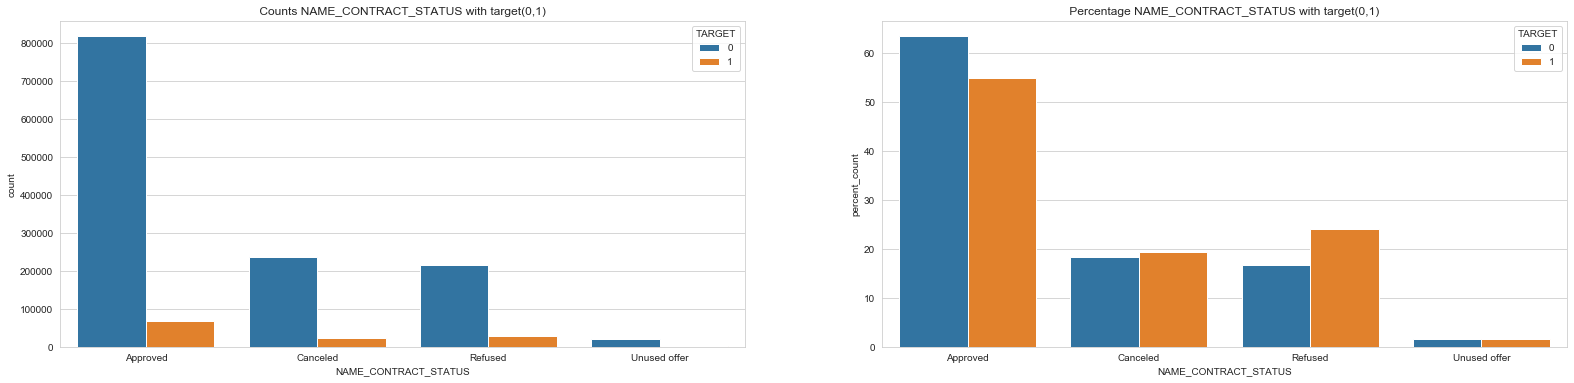

In [53]:
# status of 'NAME_CONTRACT_STATUS' of previous loan

plot_features.display_targetfeature(df_train_previous_eda,'TARGET','NAME_CONTRACT_STATUS','SK_ID_CURR')

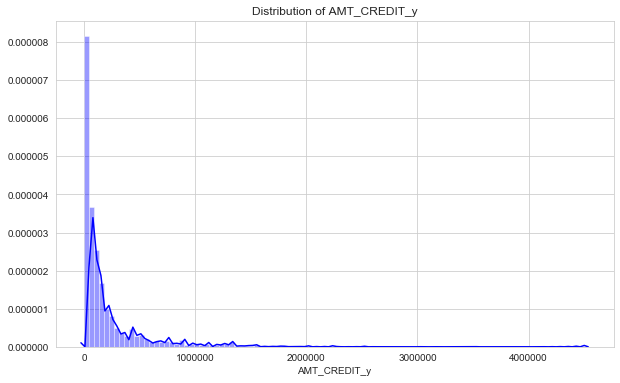

In [55]:
# 'AMT_CREDIT_y' of previous loan

plot_features.plot_distribution_onefeature(df_train_previous_eda,'AMT_CREDIT_y',color = 'blue')

The correlation between AMT_CREDIT_y and the TARGET is -0.0024
Median value for loan that was not repaid = 74700.0000
Median value for loan that was repaid = 80968.5000


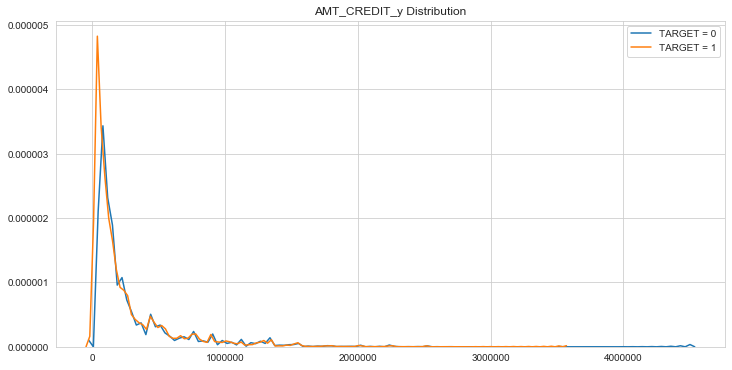

In [363]:
# kde plot AMT_CREDIT_y

manage_corr.Kde_target('AMT_CREDIT_y',df_train_previous_eda)

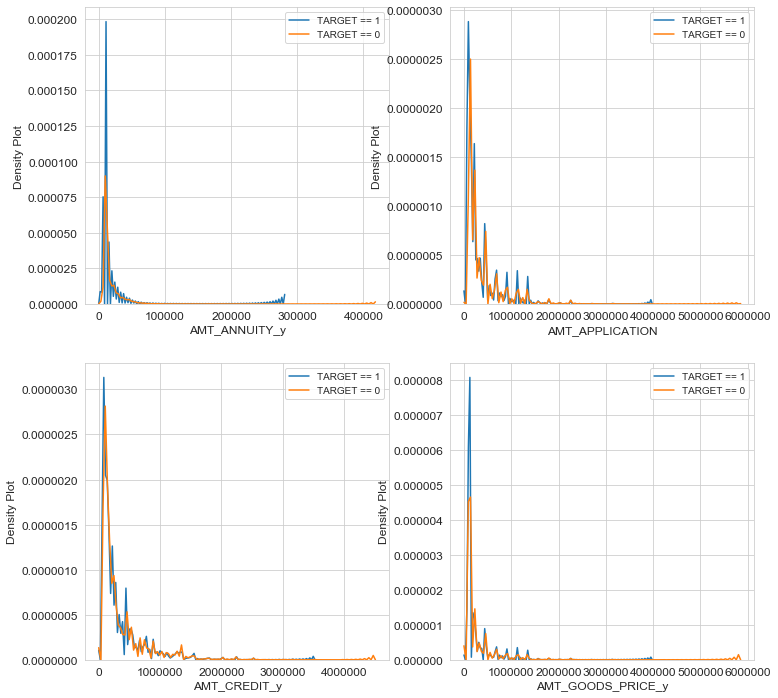

In [56]:
# compare of previous loan 'AMT_ANNUITY_y', 'AMT_APPLICATION' ,'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y'

features = ['AMT_ANNUITY_y', 'AMT_APPLICATION','AMT_CREDIT_y', 'AMT_GOODS_PRICE_y']

plot_features.plot_distribution_comp(df_train_previous_eda,features,n_row=2)

## Creating auto features by featurestool library

featuretool libray is used to create all possible statistic aggregation and transform features automatically. Here automative_features_app.csv dataframe is created the library with aggregation funtion count,max,min,mode,mean,sum.  1215 features are generated .

In [35]:
# import  featuretools library
import featuretools as ft

# initialization feature tool
# creat empty entity set

es = ft.EntitySet(id = 'clients')

In [36]:
es

Entityset: clients
  Entities:
  Relationships:
    No relationships

In [37]:
# joining test and train app for featuretool

df_app_test['TARGET'] = np.nan
df_app_test['SET'] = 'test'
df_app_train['SET']='train'

app = df_app_train.append(df_app_test,ignore_index=True)
print(app.shape)
app.head()

(356255, 74)


AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
0      24700.5    406597.5         351000.0          202500.0   
1      35698.5   1293502.5        1129500.0          270000.0   
2       6750.0    135000.0         135000.0           67500.0   
3      29686.5    312682.5         297000.0          135000.0   
4      21865.5    513000.0         513000.0          121500.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                      0.000                    0.000000   
1                      0.000                    0.000000   
2                      0.000                    0.000000   
3                      0.007                    0.006402   
4                      0.000                    0.000000   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                   0.000000                   0.000000   
1                   0.000000                   0.000000   
2                   0.000000                   0.000000   
3                   0.267395                   0.265474   
4                   0.000000                   0.000000   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR  CNT_CHILDREN  \
0                    0.000000                    1.000000             0   
1                    0.000000                    0.000000             0   
2                    0.000000                    0.000000             0   
3                    0.034362                    1.899974             0   
4                    0.000000                    0.000000             0   

   CNT_FAM_MEMBERS CODE_GENDER  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  \
0              1.0           M       -9461           -637            -2120   
1              2.0           F      -16765          -1188             -291   
2              1.0           M      -19046           -225            -2531   
3              2.0           F      -19005          -3039            -2437   
4              1.0           M      -19932          -3038            -3458   

   DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  DEF_30_CNT_SOCIAL_CIRCLE  \
0                 -1134.0            -3648.0                       2.0   
1                  -828.0            -1186.0                       0.0   
2                  -815.0            -4260.0                       0.0   
3                  -617.0            -9833.0                       0.0   
4                 -1106.0            -4311.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  EXT_SOURCE_2  EXT_SOURCE_3  FLAG_CONT_MOBILE  \
0                       2.0      0.262949      0.139376                 1   
1                       0.0      0.622246      0.510853                 1   
2                       0.0      0.555912      0.729567                 1   
3                       0.0      0.650442      0.510853                 1   
4                       0.0      0.322738      0.510853                 1   

   FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_2  FLAG_DOCUMENT_20  \
0                 0                 0                0            

In [38]:
# check duplicate before adding EntitySet

print(app['SK_ID_CURR'].duplicated().sum())
print(df_bureau['SK_ID_BUREAU'].duplicated().sum())
print(df_previous['SK_ID_PREV'].duplicated().sum())


0
0
0


In [39]:
# bureau and prevoius which have primary column id ( SK_ID_BUREAU and SK_ID_PREV)
es = es.entity_from_dataframe(entity_id='app',dataframe=app,index='SK_ID_CURR')
es = es.entity_from_dataframe(entity_id='bureau',dataframe=df_bureau,index='SK_ID_BUREAU')
es = es.entity_from_dataframe(entity_id='previous',dataframe=df_previous,index='SK_ID_PREV')

In [40]:
# make another table which havenot primary key 

es = es.entity_from_dataframe(entity_id='bureau_balance',dataframe=df_bureau_balance, 
                               make_index= True , index='bureau_balance_index')
es = es.entity_from_dataframe(entity_id='cash',dataframe=df_cash, 
                              make_index= True , index='cash_index')
es = es.entity_from_dataframe(entity_id='credit',dataframe=df_credit, 
                               make_index= True , index='credits_index')
es = es.entity_from_dataframe(entity_id='payment',dataframe=df_payment, 
                               make_index= True , index='payment_index')

In [109]:
print(" Parent app : \n\n" , app.iloc[:5,112:115])
print("child bureau: \n\n", df_bureau[df_bureau['SK_ID_CURR']==100002].iloc[:5,:5])

 Parent app : 

 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
child bureau: 

         SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT
675684      100002       6158904        Closed      currency 1        -1125
675685      100002       6158905        Closed      currency 1         -476
675686      100002       6158906        Closed      currency 1        -1437
675687      100002       6158907        Closed      currency 1        -1121
675688      100002       6158908        Closed      currency 1         -645


In [41]:
es

Entityset: clients
  Entities:
    app [Rows: 356255, Columns: 74]
    bureau [Rows: 1716428, Columns: 15]
    previous [Rows: 1670214, Columns: 26]
    bureau_balance [Rows: 27299925, Columns: 4]
    cash [Rows: 10001358, Columns: 9]
    credit [Rows: 3840312, Columns: 24]
    payment [Rows: 13605401, Columns: 9]
  Relationships:
    No relationships

In [25]:
es['cash']

Entity: cash
  Variables:
    cash_index (dtype: index)
    SK_ID_PREV (dtype: numeric)
    SK_ID_CURR (dtype: numeric)
    MONTHS_BALANCE (dtype: numeric)
    CNT_INSTALMENT (dtype: numeric)
    CNT_INSTALMENT_FUTURE (dtype: numeric)
    NAME_CONTRACT_STATUS (dtype: categorical)
    SK_DPD (dtype: numeric)
    SK_DPD_DEF (dtype: numeric)
  Shape:
    (Rows: 10001358, Columns: 9)

In [42]:

# make relationships between dataset 
# it should be one-to-many because according to data description app is parent table 

#Relationship between application and bureau 

r_app_bureau = ft.Relationship(es['app']['SK_ID_CURR'],es['bureau']['SK_ID_CURR'])

# Relationship between bureau and bureau_balance 

r_bureau_bureaubalance = ft.Relationship(es['bureau']['SK_ID_BUREAU'],es['bureau_balance']['SK_ID_BUREAU'])

# Relationship between application and  previous_application 

r_app_previous = ft.Relationship(es['app']['SK_ID_CURR'],es['previous']['SK_ID_CURR'])

# Relationship between previous_application and  POS_CASH_balance 

r_previous_cash = ft.Relationship(es['previous']['SK_ID_PREV'],es['cash']['SK_ID_PREV'])

# Relationship between previous_application and  credit_card_balance 

r_previous_credit = ft.Relationship(es['previous']['SK_ID_PREV'],es['credit']['SK_ID_PREV'])

# Relationship between previous_application and  instalment_payments

r_previous_payment = ft.Relationship(es['previous']['SK_ID_PREV'],es['payment']['SK_ID_PREV'])


In [43]:
# add relationship 

es = es.add_relationships([r_app_bureau,r_bureau_bureaubalance,r_app_previous,
                          r_previous_cash,r_previous_credit,r_previous_payment])


In [44]:
# check relationship
es

Entityset: clients
  Entities:
    app [Rows: 356255, Columns: 74]
    bureau [Rows: 1716428, Columns: 15]
    previous [Rows: 1670214, Columns: 26]
    bureau_balance [Rows: 27299925, Columns: 4]
    cash [Rows: 10001358, Columns: 9]
    credit [Rows: 3840312, Columns: 24]
    payment [Rows: 13605401, Columns: 9]
  Relationships:
    bureau.SK_ID_CURR -> app.SK_ID_CURR
    bureau_balance.SK_ID_BUREAU -> bureau.SK_ID_BUREAU
    previous.SK_ID_CURR -> app.SK_ID_CURR
    cash.SK_ID_PREV -> previous.SK_ID_PREV
    credit.SK_ID_PREV -> previous.SK_ID_PREV
    payment.SK_ID_PREV -> previous.SK_ID_PREV

In [29]:
# checking primitives in EntitySet
ft.list_primitives()

name         type  \
0                  min  aggregation   
1                 mean  aggregation   
2                trend  aggregation   
3      time_since_last  aggregation   
4                  any  aggregation   
..                 ...          ...   
73               month    transform   
74                  or    transform   
75    multiply_boolean    transform   
76  less_than_equal_to    transform   
77              minute    transform   

                                          description  
0   Calculates the smallest value, ignoring `NaN` ...  
1          Computes the average for a list of values.  
2       Calculates the trend of a variable over time.  
3   Calculates the time elapsed since the last dat...  
4        Determines if any value is 'True' in a list.  
..                                                ...  
73          Determines the month value of a datetime.  
74              Element-wise logical OR of two lists.  
75  Element-wise multiplication of two lists of bo...  
76  Determines if values in one list are less than...  
77        Determines the minutes value of a datetime.  

[78 rows x 3 columns]

In [30]:
# list of permitives i.e aggregtion and transform 
premitives = ft.list_primitives()
print(premitives[premitives['type']=='aggregation']['name'],"\n")
premitives[premitives['type']=='transform'][:]

0                  min
1                 mean
2                trend
3      time_since_last
4                  any
5        n_most_common
6                first
7             num_true
8                 skew
9                  max
10               count
11                mode
12                 sum
13    time_since_first
14                 all
15    avg_time_between
16                last
17        percent_true
18             entropy
19                 std
20          num_unique
21              median
Name: name, dtype: object 



name       type  \
22                modulo_by_feature  transform   
23                 multiply_numeric  transform   
24                        less_than  transform   
25                             hour  transform   
26                          cum_max  transform   
27                           negate  transform   
28                   modulo_numeric  transform   
29          subtract_numeric_scalar  transform   
30            greater_than_equal_to  transform   
31                             isin  transform   
32                         cum_mean  transform   
33                       percentile  transform   
34            divide_numeric_scalar  transform   
35               add_numeric_scalar  transform   
36                     greater_than  transform   
37                         absolute  transform   
38                          cum_sum  transform   
39                        num_words  transform   
40                 not_equal_scalar  transform   
41                          weekday  transform   
42                     equal_scalar  transform   
43                        haversine  transform   
44                             year  transform   
45                   divide_numeric  transform   
46                         latitude  transform   
47        less_than_equal_to_scalar  transform   
48                             week  transform   
49                              and  transform   
50          multiply_numeric_scalar  transform   
51                 less_than_scalar  transform   
52                              not  transform   
53                           second  transform   
54            modulo_numeric_scalar  transform   
55  scalar_subtract_numeric_feature  transform   
56                             diff  transform   
57                              day  transform   
58                          cum_min  transform   
59     greater_than_equal_to_scalar  transform   
60                divide_by_feature  transform   
61                 subtract_numeric  transform   
62              greater_than_scalar  transform   
63                       time_since  transform   
64                        cum_count  transform   
65              time_since_previous  transform   
66                          is_null  transform   
67                      add_numeric  transform   
68                   num_characters  transform   
69                        not_equal  transform   
70                       is_weekend  transform   
71                            equal  transform   
72                        longitude  transform   
73                            month  transform   
74                               or  transform   
75                 multiply_boolean  transform   
76               less_than_equal_to  transform   
77                           minute  transform   

                                          description  
22  Return the modulo of a scalar by each element ...  
23          Element-wise multiplication of two lists.  
24  Determines if values in one list are less than...  
25           Determines the hour value of a datetime.  
26                 Calculates the cumulative maximum.  
27                           Negates a numeric value.  
28                  Element-wise modulo of two lists.  
29   Subtract a scalar from each element in the list.  
30  Determines if values in one list are greater t...  
31  Determines whether a value is present in a pro...  
32                    Calculates the cumulative mean.  
33  Determines the percentile rank for each value ...  
34       Divide each element in the list by a scalar.  
35            Add a scalar to each value in the list.  
36  Determines if values in one list are greater t...  
37           Computes the absolute value of a number.  
38                     Calculates the cumulative sum.  
39  Determines the number of words in a string by ...  
40  Determines if values in a list are not equal t...  
41    Determines the day of the week from a datetime.  
42  

In [46]:
# default primitives from features 

default_agg_premitive = ['sum','max','min','std','mode','mean','median','count','skew','num_unique']

default_trans_premitive = ['day','year','month','weekday','num_words','num_characters','haversine']


default_agg_premitive_reduce  = ['sum','max','min','mode','mean','count']

default_agg_premitive_reduce_update  = ['sum','max','mean','count']

In [116]:
# creative features 

#feature_matrix , feature_name = ft.dfs(entityset=es,target_entity='app',
#                                      trans_primitives=default_trans_premitive,
#                                      agg_primitives=default_agg_premitive,
#                                      max_depth=2,features_only=False,verbose =True)

Built 2818 features
Elapsed: 10:04 | Progress:  10%|▉         

KeyboardInterrupt: 

In [32]:
# creative features_aggregation only 

#feature_matrix_spec , feature_name_spec = ft.dfs(entityset=es,target_entity='app',
#                                                 agg_primitives=default_agg_premitive_reduce,
#                                                  max_depth=2,features_only=False,verbose =True)

Built 1215 features
Elapsed: 1:40:37 | Progress: 100%|██████████


In [34]:
# save auto created features on automative_features_app.csv file

feature_matrix_spec.to_csv("Data/Home_credit/automative_features_app.csv")

In [ ]:
# creative features_aggregation only 

feature_matrix_spec , feature_name_spec = ft.dfs(entityset=es,target_entity='app',
                                                 agg_primitives=default_agg_premitive_reduce_update,
                                                  max_depth=2,features_only=False,verbose =True)

Built 605 features
Elapsed: 04:19 | Progress:  95%|█████████▍

## Retriving  and test model new auto created features dataset from csv file .

In [368]:
# test feature engineering

auto_feature = pd.read_csv("Data/Home_credit/automative_features_app.csv")
print(auto_feature.shape)
auto_feature.head()

(356255, 1216)


SK_ID_CURR  AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
0      100002      24700.5    406597.5         351000.0          202500.0   
1      100003      35698.5   1293502.5        1129500.0          270000.0   
2      100004       6750.0    135000.0         135000.0           67500.0   
3      100006      29686.5    312682.5         297000.0          135000.0   
4      100007      21865.5    513000.0         513000.0          121500.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        NaN                         NaN   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR  APARTMENTS_AVG  \
0                         0.0                         1.0          0.0247   
1                         0.0                         0.0          0.0959   
2                         0.0                         0.0             NaN   
3                         NaN                         NaN             NaN   
4                         0.0                         0.0             NaN   

   APARTMENTS_MEDI  APARTMENTS_MODE  BASEMENTAREA_AVG  BASEMENTAREA_MEDI  \
0           0.0250           0.0252            0.0369             0.0369   
1           0.0968           0.0924            0.0529             0.0529   
2              NaN              NaN               NaN                NaN   
3              NaN              NaN               NaN                NaN   
4              NaN              NaN               NaN                NaN   

   BASEMENTAREA_MODE  CNT_CHILDREN  CNT_FAM_MEMBERS CODE_GENDER  \
0             0.0383             0              1.0           M   
1             0.0538             0              2.0           F   
2                NaN             0              1.0           M   
3                NaN             0              2.0           F   
4                NaN             0              1.0           M   

   COMMONAREA_AVG  COMMONAREA_MEDI  COMMONAREA_MODE  DAYS_BIRTH  \
0          0.0143           0.0144           0.0144       -9461   
1          0.0605           0.0608           0.0497      -16765   
2             NaN              NaN              NaN      -19046   
3             NaN              NaN              NaN      -19005   
4             NaN              NaN              NaN      -19932   

   DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  \
0           -637            -2120                 -1134.0            -3648.0   
1          -1188             -291                  -828.0            -1186.0   
2           -225            -2531                  -815.0            -4260.0   
3          -3039            -2437                  -617.0            -9833.0   
4          -3038            -3458                 -1106.0            -4311.0   

   DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  ELEVATORS_AVG  \
0                       2.0                       2.0           0.00   
1                       0.0                       0.0           0.08   
2                       0.0                       0.0            NaN   
3                       0.0                       0.0            NaN   
4                       0.0                       0.0            NaN   

   ELEVATORS_MEDI  ELEVATORS_MODE EMERGENCYSTATE_MODE  ENTRANCES_AVG  \
0            0.00          0.0000                  No         0.0690   
1            0.08          0.0806       

In [98]:
# check validation between  original dataframe and created dataframe
df_bureau[df_bureau['SK_ID_CURR']==100002]

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
675684       100002       6158904        Closed      currency 1        -1125   
675685       100002       6158905        Closed      currency 1         -476   
675686       100002       6158906        Closed      currency 1        -1437   
675687       100002       6158907        Closed      currency 1        -1121   
675688       100002       6158908        Closed      currency 1         -645   
675689       100002       6158909        Active      currency 1         -103   
1337779      100002       6158903        Active      currency 1        -1042   
1486113      100002       6113835        Closed      currency 1        -1043   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
675684                    0         -1038.000000       -1038.000000   
675685                    0           510.517362         -48.000000   
675686                    0         -1072.000000       -1185.000000   
675687                    0          -911.000000        -911.000000   
675688                    0            85.000000         -36.000000   
675689                    0           510.517362       -1017.437148   
1337779                   0           780.000000       -1017.437148   
1486113                   0            62.000000        -967.000000   

         CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
675684                    0       40761.000        137085.119952   
675685                    0           0.000             0.000000   
675686                    0      135000.000             0.000000   
675687                    0       19071.000        137085.119952   
675688                    0      120735.000             0.000000   
675689                    0       31988.565             0.000000   
1337779                   0      450000.000        245781.000000   
1486113                   0       67500.000        137085.119952   

         AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  \
675684             6229.51498                     0.0      Credit card   
675685             6229.51498                     0.0      Credit card   
675686                0.00000                     0.0  Consumer credit   
675687             6229.51498                     0.0  Consumer credit   
675688                0.00000                     0.0  Consumer credit   
675689            31988.56500                     0.0      Credit card   
1337779               0.00000                     0.0  Consumer credit   
1486113            6229.51498                     0.0      Credit card   

         DAYS_CREDIT_UPDATE  
675684                -1038  
675685                  -47  
675686                -1185  
675687                 -906  
675688                  -34  
675689                  -24  
1337779                  -7  
1486113                -758

In [99]:
#validation with original dataframe
df_bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum()

SK_ID_CURR
100001    1453365.000
100002     865055.565
100003    1017400.500
100004     189037.800
100005     657126.000
             ...     
456249    3693858.660
456250    3086459.550
456253    3960000.000
456254      45000.000
456255    3801919.500
Name: AMT_CREDIT_SUM, Length: 305811, dtype: float64

In [303]:
# short descriptions of auto_features dataframe
auto_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Columns: 1216 entries, SK_ID_CURR to MEAN(payment.previous.SELLERPLACE_AREA)
dtypes: float64(1083), int64(40), object(93)
memory usage: 3.2+ GB


In [371]:
# manage null value

manage_df.missing_data_display(auto_feature)

Total    Percent
OCCUPATION_TYPE                                    111996  31.437032
MEAN(bureau.DAYS_ENDDATE_FACT)                      88100  24.729477
MIN(bureau.DAYS_ENDDATE_FACT)                       88100  24.729477
MAX(bureau.DAYS_ENDDATE_FACT)                       88100  24.729477
MODE(cash.previous.NAME_TYPE_SUITE)                 84021  23.584511
...                                                   ...        ...
SUM(previous.MAX(payment.NUM_INSTALMENT_VERSION))       0   0.000000
SUM(previous.MAX(payment.DAYS_ENTRY_PAYMENT))           0   0.000000
SUM(previous.MIN(credit.AMT_PAYMENT_CURRENT))           0   0.000000
SUM(previous.MAX(credit.CNT_DRAWINGS_CURRENT))          0   0.000000
SK_ID_CURR                                              0   0.000000

[805 rows x 2 columns]

In [370]:
# delete null values 
manage_df.delete_missing_values(auto_feature)

In [372]:
# check diminsion of auto feature dataframe

print(auto_feature.shape)
auto_feature.head()

(356255, 805)


SK_ID_CURR  AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
0      100002      24700.5    406597.5         351000.0          202500.0   
1      100003      35698.5   1293502.5        1129500.0          270000.0   
2      100004       6750.0    135000.0         135000.0           67500.0   
3      100006      29686.5    312682.5         297000.0          135000.0   
4      100007      21865.5    513000.0         513000.0          121500.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        NaN                         NaN   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR  CNT_CHILDREN  \
0                         0.0                         1.0             0   
1                         0.0                         0.0             0   
2                         0.0                         0.0             0   
3                         NaN                         NaN             0   
4                         0.0                         0.0             0   

   CNT_FAM_MEMBERS CODE_GENDER  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  \
0              1.0           M       -9461           -637            -2120   
1              2.0           F      -16765          -1188             -291   
2              1.0           M      -19046           -225            -2531   
3              2.0           F      -19005          -3039            -2437   
4              1.0           M      -19932          -3038            -3458   

   DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  DEF_30_CNT_SOCIAL_CIRCLE  \
0                 -1134.0            -3648.0                       2.0   
1                  -828.0            -1186.0                       0.0   
2                  -815.0            -4260.0                       0.0   
3                  -617.0            -9833.0                       0.0   
4                 -1106.0            -4311.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  EXT_SOURCE_2  EXT_SOURCE_3  FLAG_CONT_MOBILE  \
0                       2.0      0.262949      0.139376                 1   
1                       0.0      0.622246           NaN                 1   
2                       0.0      0.555912      0.729567                 1   
3                       0.0      0.650442           NaN                 1   
4                       0.0      0.322738           NaN                 1   

   FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_2  FLAG_DOCUMENT_

In [373]:
# delete row of null values

auto_feature.dropna(inplace = True)

print(auto_feature.shape)
auto_feature.head()

(103672, 805)


SK_ID_CURR  AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
2       100004       6750.0    135000.0         135000.0           67500.0   
5       100008      27517.5    490495.5         454500.0           99000.0   
6       100009      41301.0   1560726.0        1395000.0          171000.0   
7       100010      42075.0   1530000.0        1530000.0          360000.0   
10      100014      21177.0    652500.0         652500.0          112500.0   

    AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  \
2                         0.0                         0.0   
5                         0.0                         0.0   
6                         0.0                         0.0   
7                         0.0                         0.0   
10                        0.0                         0.0   

    AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
2                         0.0                        0.0   
5                         0.0                        1.0   
6                         1.0                        1.0   
7                         0.0                        0.0   
10                        1.0                        0.0   

    AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR  CNT_CHILDREN  \
2                          0.0                         0.0             0   
5                          0.0                         1.0             0   
6                          0.0                         2.0             1   
7                          0.0                         0.0             0   
10                         0.0                         0.0             1   

    CNT_FAM_MEMBERS CODE_GENDER  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  \
2               1.0           M      -19046           -225            -2531   
5               2.0           M      -16941          -1588             -477   
6               3.0           F      -13778          -3130             -619   
7               2.0           M      -18850           -449            -2379   
10              3.0           F      -10197           -679             -738   

    DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  DEF_30_CNT_SOCIAL_CIRCLE  \
2                   -815.0            -4260.0                       0.0   
5                  -2536.0            -4970.0                       0.0   
6                  -1562.0            -1213.0                       0.0   
7                  -1070.0            -4597.0                       0.0   
10                  -844.0            -4427.0                       0.0   

    DEF_60_CNT_SOCIAL_CIRCLE  EXT_SOURCE_2  EXT_SOURCE_3  FLAG_CONT_MOBILE  \
2                        0.0      0.555912      0.729567                 1   
5                        0.0      0.354225      0.621226                 1   
6                        0.0      0.724000      0.492060                 1   
7                        0.0      0.714279      0.540654                 1   
10                       0.0      0.651862      0.363945                 1   

    FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
2                  0                 0                 0                 0   
5                  0                 0                 0                 0   
6                  0                 0                 0                 0   
7                  0                 0                 0                 0   
10                 0                 0                 0                 0   

    FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
2                  0                 0                 0                 0   
5                  0                 0                 0                 0   
6                  1                 0                 0                 0   
7                  0                 0                 0                 0   
10                 0                 0                 0                 0   

    FLAG_DOCUMENT

In [310]:
#handle missing value by mean
manage_df.handle_missing_value(auto_feature)

In [374]:
# select categorical data from aut_feature dataframe

X_cat = auto_feature.select_dtypes(include='object')
X_cat

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_CONTRACT_TYPE  \
2                M            Y               Y    Revolving loans   
5                M            N               Y         Cash loans   
6                F            Y               Y         Cash loans   
7                M            Y               Y         Cash loans   
10               F            N               Y         Cash loans   
...            ...          ...             ...                ...   
307499           F            N               Y         Cash loans   
307502           F            N               Y         Cash loans   
307503           F            N               Y         Cash loans   
307508           F            N               Y         Cash loans   
307510           F            N               N         Cash loans   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
2       Secondary / secondary special  Single / not married   
5       Secondary / secondary special               Married   
6                    Higher education               Married   
7                    Higher education               Married   
10                   Higher education               Married   
...                               ...                   ...   
307499  Secondary / secondary special               Married   
307502  Secondary / secondary special               Married   
307503               Higher education  Single / not married   
307508               Higher education             Separated   
307510               Higher education               Married   

        NAME_HOUSING_TYPE      NAME_INCOME_TYPE  NAME_TYPE_SUITE  \
2       House / apartment               Working    Unaccompanied   
5       House / apartment         State servant  Spouse, partner   
6       House / apartment  Commercial associate    Unaccompanied   
7       House / apartment         State servant    Unaccompanied   
10      House / apartment               Working    Unaccompanied   
...                   ...                   ...              ...   
307499  House / apartment  Commercial associate    Unaccompanied   
307502  House / apartment               Working    Unaccompanied   
307503  House / apartment  Commercial associate    Unaccompanied   
307508  House / apartment               Working    Unaccompanied   
307510  House / apartment  Commercial associate    Unaccompanied   

       OCCUPATION_TYPE       ORGANIZATION_TYPE    SET  \
2             Laborers              Government  train   
5             Laborers                   Other  train   
6          Accountants  Business Entity Type 3  train   
7             Managers                   Other  train   
10          Core staff                Medicine  train   
...                ...                     ...    ...   
307499  Medicine staff                Medicine  train   
307502        Laborers                  School  train   
307503      Core staff                    Bank  train   
307508        Managers                  School  train   
307510        Laborers  Business Entity Type 3  train   

       WEEKDAY_APPR_PROCESS_START MODE(bureau.CREDIT_ACTIVE)  \
2                          MONDAY                     Closed   
5                       WEDNESDAY                     Closed   
6                          SUNDAY                     Closed   
7                          MONDAY                     Active   
10                       SATURDAY                     Closed   
...                           ...                        ...   
307499                    TUESDAY                     Closed   
307502                     MONDAY                     Closed   
307503                   SATURDAY                     Closed   
307508                   THURSDAY                     Active   
307510                   THURSDAY                     Closed   

       MODE(bureau.CREDIT_CURRENCY) MODE(bureau.CREDIT_TYPE)  \
2                        currency 1          Consumer credit   
5         

In [375]:
# get dummies of categorical data of auto_features dataframe

X_cat_dummy = pd.get_dummies(X_cat,drop_first= True)
print(X_cat_dummy.shape)
X_cat_dummy.head()

CODE_GENDER_M  CODE_GENDER_XNA  FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_Y  \
2                   1                0               1                  1   
5                   1                0               0                  1   
6                   0                0               1                  1   
7                   1                0               1                  1   
10                  0                0               0                  1   
...               ...              ...             ...                ...   
307499              0                0               0                  1   
307502              0                0               0                  1   
307503              0                0               0                  1   
307508              0                0               0                  1   
307510              0                0               0                  0   

        NAME_CONTRACT_TYPE_Revolving loans  \
2                                        1   
5                                        0   
6                                        0   
7                                        0   
10                                       0   
...                                    ...   
307499                                   0   
307502                                   0   
307503                                   0   
307508                                   0   
307510                                   0   

        NAME_EDUCATION_TYPE_Higher education  \
2                                          0   
5                                          0   
6                                          1   
7                                          1   
10                                         1   
...                                      ...   
307499                                     0   
307502                                     0   
307503                                     1   
307508                                     1   
307510                                     1   

        NAME_EDUCATION_TYPE_Incomplete higher  \
2                                           0   
5                                           0   
6                                           0   
7                                           0   
10                                          0   
...                                       ...   
307499                                      0   
307502                                      0   
307503                                      0   
307508                                      0   
307510                                      0   

        NAME_EDUCATION_TYPE_Lower secondary  \
2                                         0   
5                                         0   
6                                         0   
7                                         0   
10                                        0   
...                                     ...   
307499                                    0   
307502                                    0   
307503                                    0   
307508                                    0   
307510                                    0   

        NAME_EDUCATION_TYPE_Secondary / secondary special  \
2                                                       1   
5                                                       1   
6                                                       0   
7                                                       0   
10                                                      0   
...                                                   ...   
307499                                                  1   
307502                                                  1   
307503                                                  0   
307508                                                  0   
307510                                                  0   

        NAME_FAMILY_STATUS_Married  NAME_FAMILY_STATUS_Separated  

In [376]:
# select numerical data from auto_features dataframe 

X_num = auto_feature.select_dtypes(exclude='object')
print(X_num.shape)
X_num.head()

(103672, 739)


SK_ID_CURR  AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  \
2           100004       6750.0    135000.0         135000.0   
5           100008      27517.5    490495.5         454500.0   
6           100009      41301.0   1560726.0        1395000.0   
7           100010      42075.0   1530000.0        1530000.0   
10          100014      21177.0    652500.0         652500.0   
...            ...          ...         ...              ...   
307499      456243      12694.5    225000.0         225000.0   
307502      456246      10620.0    225000.0         225000.0   
307503      456247      17770.5    345510.0         247500.0   
307508      456253      29979.0    677664.0         585000.0   
307510      456255      49117.5    675000.0         675000.0   

        AMT_INCOME_TOTAL  AMT_REQ_CREDIT_BUREAU_DAY  \
2                67500.0                        0.0   
5                99000.0                        0.0   
6               171000.0                        0.0   
7               360000.0                        0.0   
10              112500.0                        0.0   
...                  ...                        ...   
307499           81000.0                        0.0   
307502           94500.0                        0.0   
307503          112500.0                        0.0   
307508          153000.0                        0.0   
307510          157500.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_MON  \
2                              0.0                        0.0   
5                              0.0                        0.0   
6                              0.0                        1.0   
7                              0.0                        0.0   
10                             0.0                        1.0   
...                            ...                        ...   
307499                         0.0                        1.0   
307502                         0.0                        0.0   
307503                         0.0                        1.0   
307508                         1.0                        1.0   
307510                         0.0                        2.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_WEEK  \
2                             0.0                         0.0   
5                             1.0                         0.0   
6                             1.0                         0.0   
7                             0.0                         0.0   
10                            0.0                         0.0   
...                           ...                         ...   
307499                        1.0                         0.0   
307502                        0.0                         0.0   
307503                        0.0                         0.0   
307508                        0.0                         0.0   
307510                        0.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_YEAR  CNT_CHILDREN  CNT_FAM_MEMBERS  DAYS_BIRTH  \
2                              0.0             0              1.0      -19046   
5                              1.0             0              2.0      -16941   
6                              2.0             1              3.0      -13778   
7                              0.0             0              2.0      -18850   
10                             0.0             1              3.0      -10197   
...                            ...           ...              ...         ...   
307499                         0.0             0              2.0      -16988   
307502                         1.0             1              3.0      -16063   
307503                         2.0             0              1.0      -11870   
307508                         1.0             0              1.0      -14966   
307510                         1.0             0              2.0      -16856   

        DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAY

In [377]:
# merge category data and numerical data 
X_final = X_num.merge(X_cat_dummy,left_index=True,right_index=True)
print(X_final.shape)
X_final.head()

(103672, 1199)


SK_ID_CURR  AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
2       100004       6750.0    135000.0         135000.0           67500.0   
5       100008      27517.5    490495.5         454500.0           99000.0   
6       100009      41301.0   1560726.0        1395000.0          171000.0   
7       100010      42075.0   1530000.0        1530000.0          360000.0   
10      100014      21177.0    652500.0         652500.0          112500.0   

    AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  \
2                         0.0                         0.0   
5                         0.0                         0.0   
6                         0.0                         0.0   
7                         0.0                         0.0   
10                        0.0                         0.0   

    AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
2                         0.0                        0.0   
5                         0.0                        1.0   
6                         1.0                        1.0   
7                         0.0                        0.0   
10                        1.0                        0.0   

    AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR  CNT_CHILDREN  \
2                          0.0                         0.0             0   
5                          0.0                         1.0             0   
6                          0.0                         2.0             1   
7                          0.0                         0.0             0   
10                         0.0                         0.0             1   

    CNT_FAM_MEMBERS  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  \
2               1.0      -19046           -225            -2531   
5               2.0      -16941          -1588             -477   
6               3.0      -13778          -3130             -619   
7               2.0      -18850           -449            -2379   
10              3.0      -10197           -679             -738   

    DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  DEF_30_CNT_SOCIAL_CIRCLE  \
2                   -815.0            -4260.0                       0.0   
5                  -2536.0            -4970.0                       0.0   
6                  -1562.0            -1213.0                       0.0   
7                  -1070.0            -4597.0                       0.0   
10                  -844.0            -4427.0                       0.0   

    DEF_60_CNT_SOCIAL_CIRCLE  EXT_SOURCE_2  EXT_SOURCE_3  FLAG_CONT_MOBILE  \
2                        0.0      0.555912      0.729567                 1   
5                        0.0      0.354225      0.621226                 1   
6                        0.0      0.724000      0.492060                 1   
7                        0.0      0.714279      0.540654                 1   
10                       0.0      0.651862      0.363945                 1   

    FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
2                  0                 0                 0                 0   
5                  0                 0                 0                 0   
6                  0                 0                 0                 0   
7                  0                 0                 0                 0   
10                 0                 0                 0                 0   

    FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
2                  0                 0                 0                 0   
5                  0                 0                 0                 0   
6                  1                 0                 0                 0   
7                  0                 0                 0                 0   
10                 0                 0                 0                 0   

    FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_2  FLAG_DOCUMENT_20  \
2           

In [379]:
# taking  30% subset data from original auto_features dataframe
X_subset = X_final.drop(columns=['TARGET'])
y_subset = X_final['TARGET']
X_train_subset , X_test_subset,y_train_subset,y_test_subset=train_test_split(X_subset,y_subset,test_size=0.3,stratify=y_subset,random_state=42)
print(X_test_subset.shape,y_test_subset.shape)

(31102, 1198) (31102,)


In [380]:
# merge data 30% balance subset datas for further steps
X_final=X_test_subset.join(y_test_subset)
print(X_final.shape)
X_final.head()

(31102, 1199)


SK_ID_CURR  AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  \
220690      355660      27864.0    948582.0         679500.0   
187337      317170      30838.5    601470.0         450000.0   
141775      264385      10620.0    225000.0         225000.0   
63292       173407      30532.5    283500.0         283500.0   
259847      400703      26176.5    788103.0         598500.0   

        AMT_INCOME_TOTAL  AMT_REQ_CREDIT_BUREAU_DAY  \
220690          225000.0                        0.0   
187337          135000.0                        0.0   
141775           90000.0                        0.0   
63292           180000.0                        0.0   
259847          135000.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_MON  \
220690                         0.0                        0.0   
187337                         0.0                        0.0   
141775                         0.0                        0.0   
63292                          0.0                        1.0   
259847                         0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_WEEK  \
220690                        0.0                         0.0   
187337                        1.0                         0.0   
141775                        0.0                         0.0   
63292                         0.0                         1.0   
259847                        0.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_YEAR  CNT_CHILDREN  CNT_FAM_MEMBERS  DAYS_BIRTH  \
220690                         2.0             1              3.0      -13526   
187337                         1.0             1              3.0      -11409   
141775                         0.0             0              1.0      -10094   
63292                          2.0             2              4.0      -11054   
259847                         0.0             2              4.0      -10569   

        DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE  \
220690          -4414            -4138                  -684.0   
187337          -2076            -1628                     0.0   
141775           -233            -1009                     0.0   
63292            -927            -3737                  -387.0   
259847          -2020            -2696                 -1785.0   

        DAYS_REGISTRATION  DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
220690            -7649.0                       0.0                       0.0   
187337            -1337.0                       1.0                       1.0   
141775           -10094.0                       2.0                       1.0   
63292             -4663.0                       0.0                       0.0   
259847              -39.0                       0.0                       0.0   

        EXT_SOURCE_2  EXT_SOURCE_3  FLAG_CONT_MOBILE  FLAG_DOCUMENT_10  \
220690      0.623643      0.401407                 1                 0   
187337      0.375263      0.638044                 1                 0   
141775      0.313823      0.301625                 1                 0   
63292       0.434778      0.535276                 1                 0   
259847      0.627750      0.574447                 1                 0   

        FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
220690                 0                 0                 0   
187337                 0                 0                 0   
141775                 0                 0                 0   
63292                  0                 0                 0   
259847                 0                 0                 0   

        FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  \
220690                 0                 0                 0   
187337                 0                 0                 0   
141775                 0                 0                 0   
63292                  0                 0           

In [381]:
# Prepare target and features

X = X_final.drop(columns=['TARGET','SK_ID_CURR'])
y= X_final['TARGET']

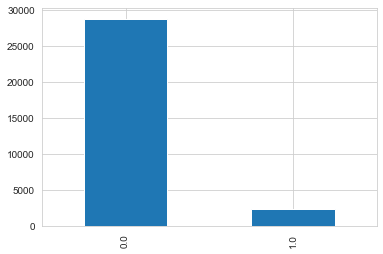

In [382]:
# check target balance 
y.value_counts().plot(kind='bar')

In [320]:
# making two class in target label
#X_final.loc[~((X_final['TARGET']==0 ) | (X_final['TARGET']==1 ) )]  = 1.0

In [4]:
# check balance 
#y.value_counts().plot(kind='bar')

In [383]:
# split train and test data for model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =.25,random_state = 23)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(23326, 1197) (7776, 1197)
(23326,) (7776,)


In [384]:
# Reduce dimension of dataframe by PCA
# Scalling for PCA 
ss = StandardScaler()

df_ss = pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)

df_ss.head()



AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
0    -0.386849    0.188934         0.062311         -0.527669   
1     1.599071   -0.353493        -0.266050          1.348725   
2     0.650444    1.015922         0.986585          0.455204   
3    -0.997022   -0.875643        -0.886287         -1.063782   
4     1.450977    1.482437         1.521691          1.348725   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                  -0.065379                    -0.07312   
1                  -0.065379                    -0.07312   
2                  -0.065379                    -0.07312   
3                  -0.065379                    -0.07312   
4                  -0.065379                    -0.07312   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                  -0.316832                   1.162576   
1                  -0.316832                  -0.447676   
2                   0.649363                   1.162576   
3                  -0.316832                  -0.447676   
4                  -0.316832                  -0.447676   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR  CNT_CHILDREN  \
0                   -0.179151                   -0.034426     -0.683994   
1                   -0.179151                   -0.578845      1.876977   
2                   -0.179151                   -0.034426     -0.683994   
3                   -0.179151                    2.143251     -0.683994   
4                   -0.179151                   -0.034426      0.596491   

   CNT_FAM_MEMBERS  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  \
0        -0.328838   -0.470842      -1.316924         1.850326   
1         1.783369    1.110486      -0.382018         0.434012   
2        -0.328838   -0.710098      -0.309758         1.283666   
3        -0.328838   -0.827137       0.434757         1.009453   
4        -0.328838   -0.403264       0.745716         1.999590   

   DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  DEF_30_CNT_SOCIAL_CIRCLE  \
0               -0.569907          -1.404341                  1.908688   
1                0.007937           1.347632                 -0.328152   
2               -1.222701          -0.194345                 -0.328152   
3                0.636554           0.724822                  1.908688   
4                1.381223          -0.393042                 -0.328152   

   DEF_60_CNT_SOCIAL_CIRCLE  EXT_SOURCE_2  EXT_SOURCE_3  FLAG_CONT_MOBILE  \
0                  2.449031      0.961058      0.879267          0.023614   
1                 -0.282184      0.739215      0.887376          0.023614   
2                 -0.282184      0.536979     -1.574848          0.023614   
3                  2.449031     -1.540661      0.879267          0.023614   
4                 -0.282184     -1.952703     -0.755881          0.023614   

   FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
0         -0.011341         -0.041962               0.0         -0.050783   
1         -0.011341         -0.041962               0.0         -0.050783   
2         -0.011341         -0.041962               0.0         -0.050783   
3         -0.011341         -0.041962               0.0         -0.050783   
4         -0.011341         -0.041962               0.0         -0.050783   

   FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0         -0.040395         -0.030725         -0.078814         -0.018522   
1         -0.040395         -0.030725         -0.078814         -0.018522   
2         -0.040395         -0.030725         -0.078814         -0.018522   
3         -0.040395         -0.030725         -0.078814         -0.018522   
4         -0.040395         -0.030725         -0.078814         -0.018522   

   FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_2  FLAG_DOCUMENT_20  \
0         -0.076863         -0.023614              0.0         -0.023614   
1         -0.076863         -0.023614              0.0        

 Number of Components: 336


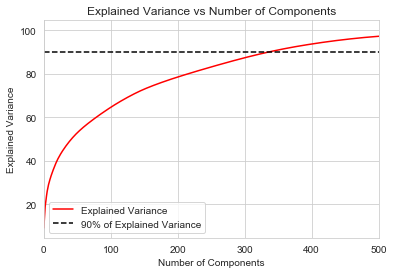

In [388]:
# finding no of components by PCA algorithm
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_ss)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(6,4))
plt.plot(d, cumsum, color='red', label = 'Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.ylabel('Explained Variance')
plt.xlabel('Number of Components')
plt.axhline(y = 90, color='k', linestyle='--', label = '90% of Explained Variance')
plt.xlim(0,500)
plt.legend(loc='best');

print(' Number of Components:',(cumsum < 90).sum())

In [389]:
# make balance on target label
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_train,y_train = sm.fit_sample(X_train,y_train)
X_test,y_test = sm.fit_sample(X_test,y_test)

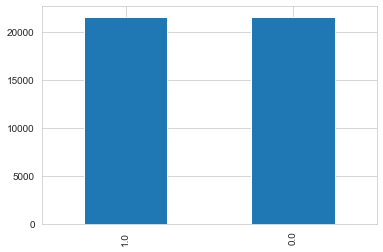

In [390]:
# checking balance
y_train.value_counts().plot(kind='bar')

### Decision Tree

In [392]:
# test dummy model

pipe = Pipeline([('ss',StandardScaler()),
                 ('pca',PCA(n_components=336)),
                 ('tree_clf',DecisionTreeClassifier(criterion='gini',max_depth=5))])

#tree_clf = DecisionTreeClassifier(criterion='gini',max_depth=5)
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('ss',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=336,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('tree_clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=5,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],

In [395]:
# predict and check accuracy
pred = pipe.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(roc_auc_score(y_test,pred))

[[5995 1176]
 [1433 5738]]
              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82      7171
         1.0       0.83      0.80      0.81      7171

    accuracy                           0.82     14342
   macro avg       0.82      0.82      0.82     14342
weighted avg       0.82      0.82      0.82     14342

0.8180867382512899


In [393]:
pipe[2]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [336]:
# plot important features
def plot_feature(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(25,20))
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.show()
    
 

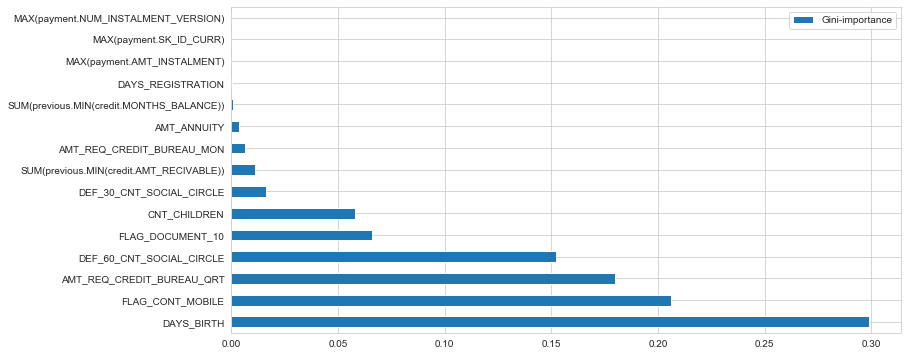

In [397]:
# plot importance features
manage_model.plot_feature(pipe[2],X_train)  

### Random Forest 

In [398]:
# randon forest
pipe_rf = Pipeline([('ss',StandardScaler()),
                    ('pca',PCA(n_components=336)),
                 ('rf',RandomForestClassifier(n_estimators=100,max_depth=5))])


#rf = RandomForestClassifier(n_estimators=100,max_depth=5)
pipe_rf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('ss',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=336,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('rf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=5, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,

In [399]:
# predict and check accuracy
pred = pipe_rf.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(roc_auc_score(y_test,pred))

[[6778  393]
 [ 887 6284]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      7171
         1.0       0.94      0.88      0.91      7171

    accuracy                           0.91     14342
   macro avg       0.91      0.91      0.91     14342
weighted avg       0.91      0.91      0.91     14342

0.9107516385441361


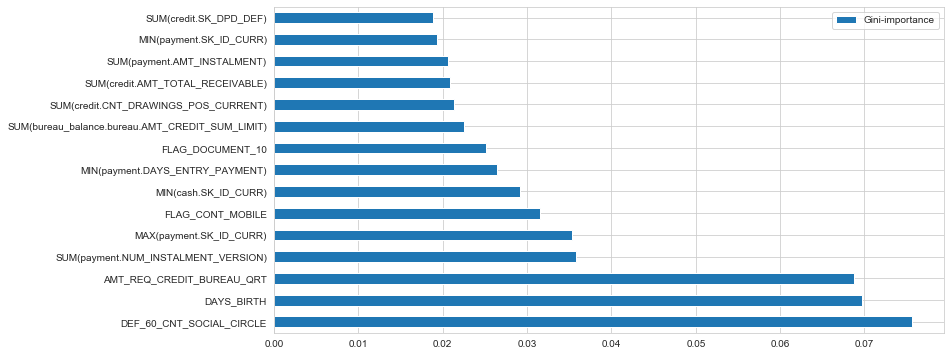

In [400]:
# plot importance features

manage_model.plot_feature(pipe_rf[2],X_train) 

In [ ]:
# RandomForest 
pipe_rf = Pipeline([('sc',StandardScaler()),
                 ('pca',PCA(n_components=336)),
                 ('rf',RandomForestClassifier(random_state=123))])


# create the grid parameter
n_estimators = [100, 300,400]
max_depth = [5, 8]
min_samples_split = [2, 5,8]
min_samples_leaf = [ 5, 10,15]

grid = [{'rf__n_estimators':n_estimators,
          'rf__max_depth':max_depth,
          'rf__min_samples_split':min_samples_split,
          'rf__min_samples_leaf':min_samples_leaf}]


gridsearch  = GridSearchCV(estimator=pipe_rf,param_grid=grid,scoring='accuracy',cv=3)
gridsearch.fit(X_train,y_train)


gridsearch.best_params_


gridsearch.scorer_

In [110]:
# Get default hyperparameters
model = lgb.LGBMClassifier()
default_params = model.get_params()

# Remove the number of estimators because we set this to 10000 in the cv call
del default_params['n_estimators']

# Cross validation with early stopping
cv_results = lgb.cv(default_params, train_set, num_boost_round = 10000, early_stopping_rounds = 100, 
                    metrics = 'auc', nfold = 5, seed = 42)

In [111]:
cv_results

{'auc-mean': [0.9265827080896136,
  0.940247290442195,
  0.9477258469303902,
  0.9552240025057067,
  0.9598302913621918,
  0.9638372424088251,
  0.9664559532810315,
  0.9682834407713337,
  0.969578718024532,
  0.9708549836900197,
  0.9718700539429082,
  0.9725012536906215,
  0.9729023476711689,
  0.9734954444992372,
  0.9741057171728189,
  0.9745079790715501,
  0.9749586686581143,
  0.9751120041470154,
  0.9754953981214518,
  0.9755857952597241,
  0.9758340653757582,
  0.9759946399067226,
  0.9762594650163509,
  0.9763937368767939,
  0.9765743730578045,
  0.9766627338358311,
  0.9767813439463172,
  0.9770252564139319,
  0.9770901378770731,
  0.9772205261435474,
  0.9772445213776333,
  0.9773107697519421,
  0.9774536844004056,
  0.9774794922001776,
  0.9775232540964603,
  0.9776273386090368,
  0.9776552854576369,
  0.977773239583863,
  0.9779459933521439,
  0.9780086435247162,
  0.9780773391683685,
  0.97814806931505,
  0.978156032516687,
  0.9781745193247284,
  0.9782691297902397,
  0.

In [ ]:
#lgbm = lgb.LGBMClassifier()

"""

default parameter

    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    subsample_for_bin=200000,
    objective=None,
    class_weight=None,
    min_split_gain=0.0,
    min_child_weight=0.001,
    min_child_samples=20,
    subsample=1.0,
    subsample_freq=0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=None,
    n_jobs=-1,
    silent=True,
"""


pipe_lgbm = Pipeline([('ss',StandardScaler()),
                    ('pca',PCA(n_components=336)),
                 ('lgbm',lgb.LGBMClassifier())])

grid_para = {'lgbm__boosting_type':['gbdt','goss','dart'],
              'lgbm__num_leave':list(range(20,150)),
              'lgbm__learning_rate':list(np.logspace(np.log10(0.005),np.log10(0.5),base =10,num=1000)),
               'lgbm__subsample_for_bin': list(range(20000, 300000, 20000)),
               'lgbm__min_child_samples': list(range(20, 500, 5)),
               'lgbm__reg_alpha': list(np.linspace(0, 1)),
                'lgbm__reg_lambda': list(np.linspace(0, 1)),
                'lgbm__colsample_bytree': list(np.linspace(0.6, 1, 10)),
                'lgbm__subsample': list(np.linspace(0.5, 1, 100)),
                'lgbm__is_unbalance': [True, False]}


# gridSearch and fit model

gs = GridSearchCV(estimator=pipe_lgbm,param_grid=grid_para,scoring="accuracy",cv = 5 )                 
gs.fit(X_train,y_train) 


gridsearch.best_params_


gridsearch.scorer_

In [76]:
model = lgb.LGBMClassifier()

In [78]:
default_params = model.get_params()
default_params

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

Text(0.5, 1.0, 'Learning Rate Distribution ')

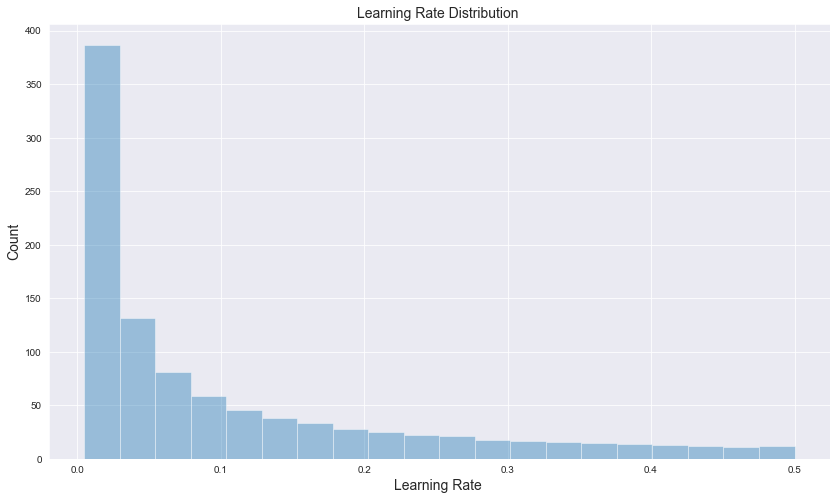

In [94]:
# plot learning rate from hyperparameter dict of lightGBM
plt.figure(figsize = (14,8))
sns.distplot(grid_para['lgbm__learning_rate'],bins=20,kde=False)
plt.xlabel("Learning Rate " ,fontsize =14)
plt.ylabel("Count" ,fontsize =14)
plt.title("Learning Rate Distribution " ,fontsize =14)